Download the dataset :
https://media.geeksforgeeks.org/wp-
content/uploads/20240319120216/housing.csv

In [1]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats

In [3]:
import pandas as pd

df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Perform the describe and info steps

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


Plot the histogram of each feature( Indicate what does histogram
indicate on median_income and house_median_age)

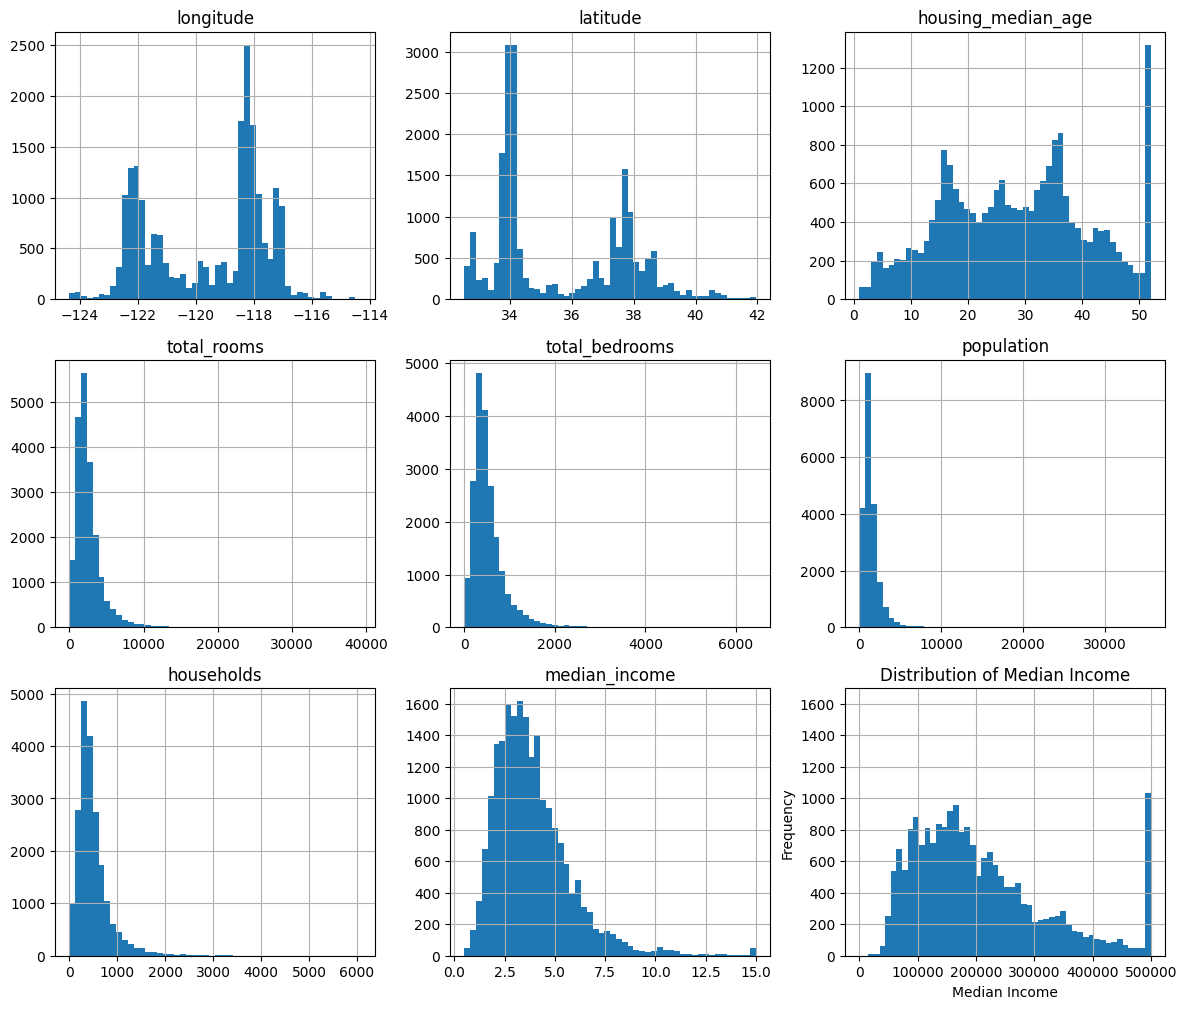

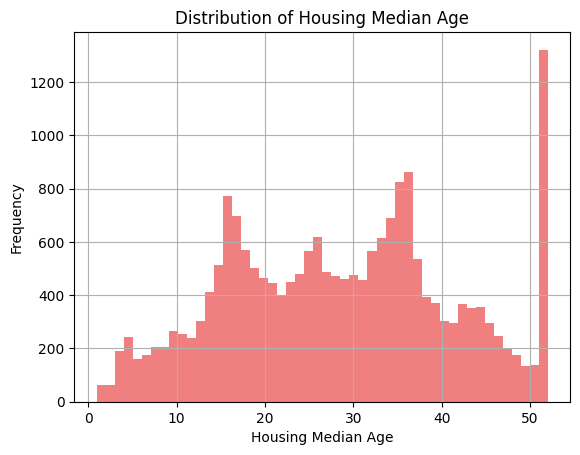

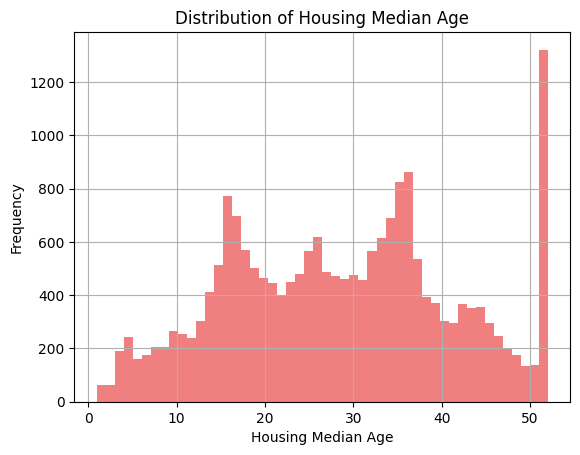

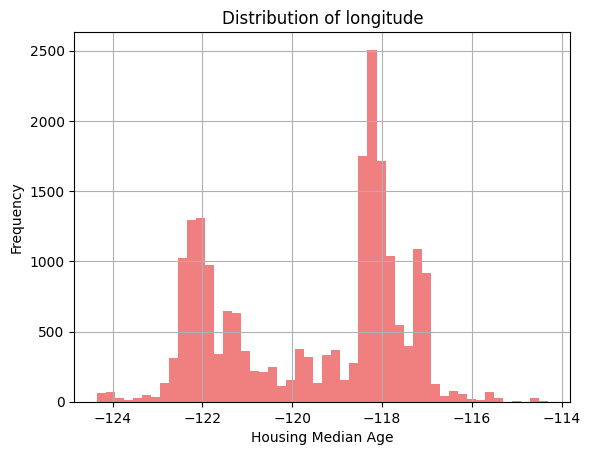

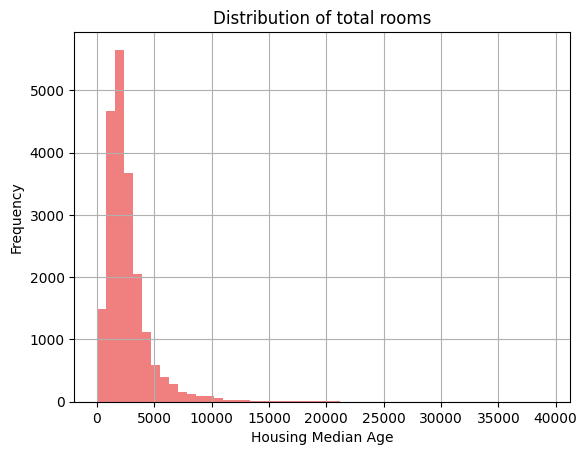

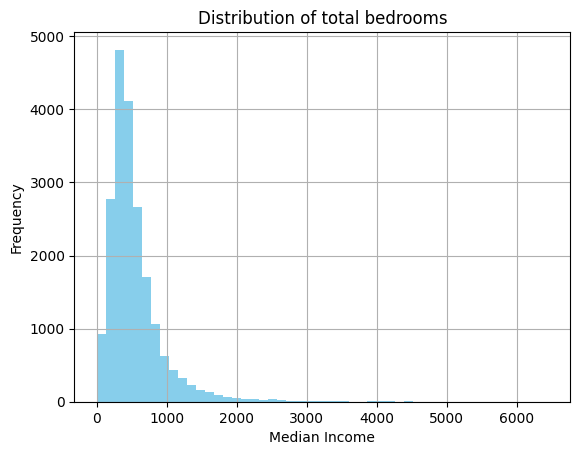

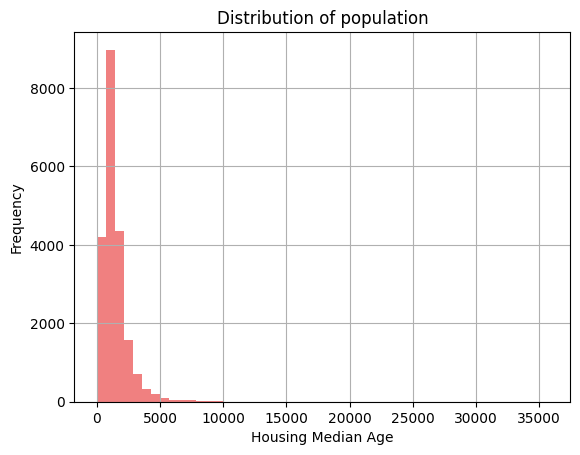

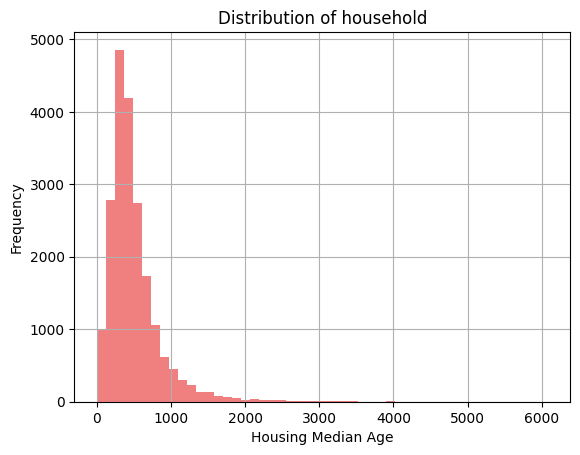

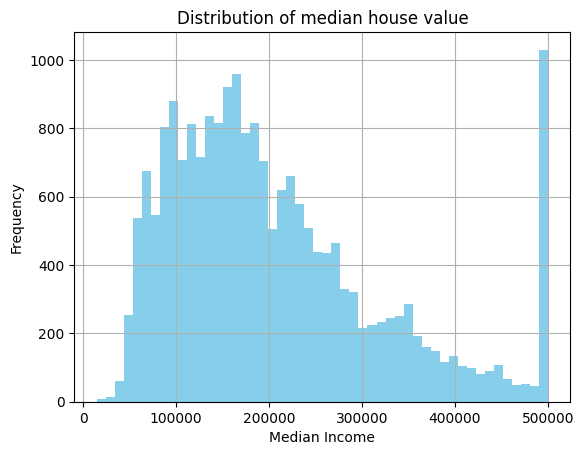

In [13]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10), bins=50)
plt.tight_layout()

df['median_income'].hist(bins=50, color='skyblue')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()
df['housing_median_age'].hist(bins=50, color='lightcoral')
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()
df['housing_median_age'].hist(bins=50, color='lightcoral')
plt.title('Distribution of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

df['longitude'].hist(bins=50, color='lightcoral')
plt.title('Distribution of longitude')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

df['total_rooms'].hist(bins=50, color='lightcoral')
plt.title('Distribution of total rooms')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

df['total_bedrooms'].hist(bins=50, color='skyblue')
plt.title('Distribution of total bedrooms')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

df['population'].hist(bins=50, color='lightcoral')
plt.title('Distribution of population')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

df['households'].hist(bins=50, color='lightcoral')
plt.title('Distribution of household')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

df['median_house_value'].hist(bins=50, color='skyblue')
plt.title('Distribution of median house value')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()





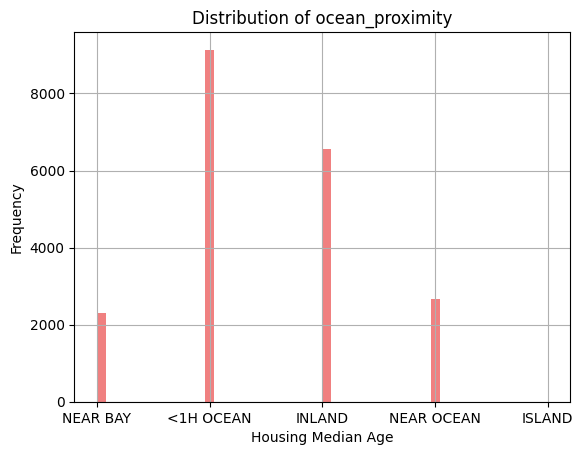

In [14]:
df['ocean_proximity'].hist(bins=50, color='lightcoral')
plt.title('Distribution of ocean_proximity')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

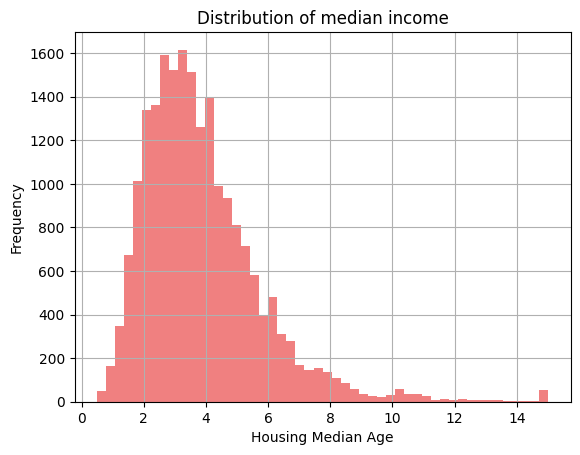

In [15]:
df['median_income'].hist(bins=50, color='lightcoral')
plt.title('Distribution of median income')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()

Demonstrate the process of creating a test set( write the difference
between random and stratified test set)

In [16]:
train_set_random, test_set_random = train_test_split(df, test_size=0.2, random_state=42)
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

train_set_strat, test_set_strat = train_test_split(df, test_size=0.2, stratify=df["income_cat"], random_state=42)
for set_ in (train_set_strat, test_set_strat):
    set_.drop("income_cat", axis=1, inplace=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [17]:
# Difference between random and stratified sampling
# Random sampling:  Samples data points randomly without considering the distribution of a specific feature.
#                  This can lead to an uneven representation of different classes or categories in the test set,
#                  especially if some classes are less frequent.
# Stratified sampling:  Divides the data into homogeneous subgroups (strata) based on a specific feature (e.g., income category),
#                       then samples randomly from each stratum proportionally to its size in the overall dataset.
#                       This helps ensure that the test set has a similar distribution of the chosen feature as the original dataset,
#                       leading to more robust and reliable model evaluation, especially for classification tasks.

List the geographical features from the dataset and plot a graph to
Visualize Geographical Data(what does the graph indicate w.r.t
housing prices and location) LATITUDE AND LONGITUDE


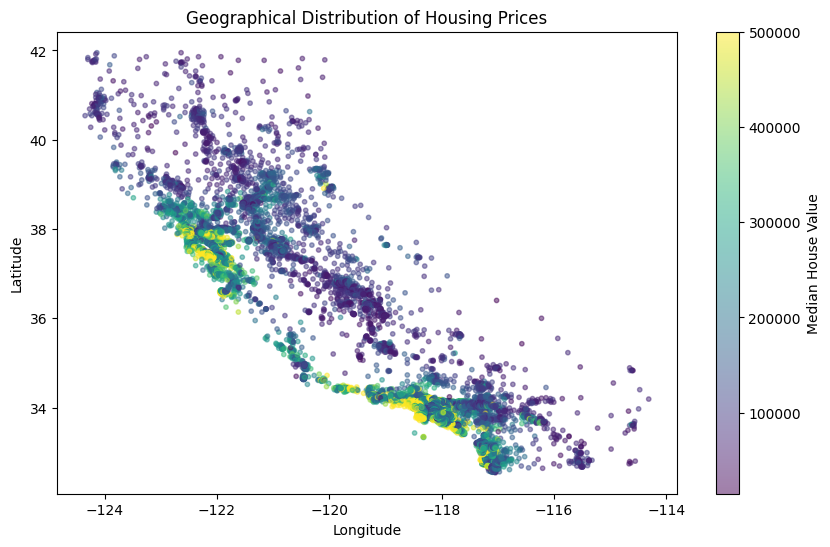

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5, s=10)
plt.colorbar(scatter, label='Median House Value')
plt.title("Geographical Distribution of Housing Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


List the geographical features from the dataset and plot a graph to
Visualize Geographical Data(what does the graph indicate w.r.t
housing prices and location) OCEAN PROXIMITY

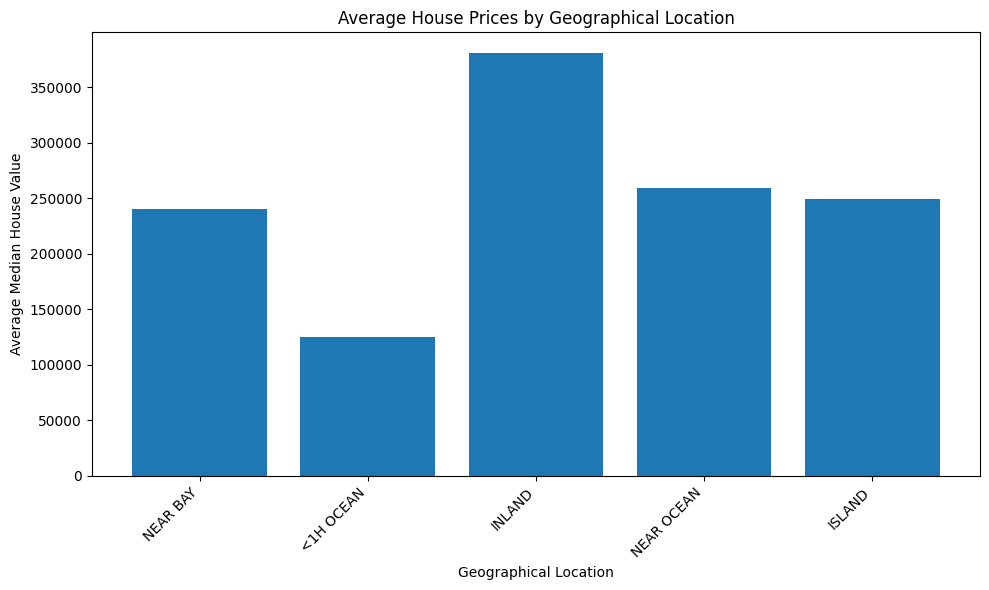

In [19]:
import matplotlib.pyplot as plt

geographical_features = df['ocean_proximity'].unique()

average_prices = df.groupby('ocean_proximity')['median_house_value'].mean()

plt.figure(figsize=(10, 6))
plt.bar(geographical_features, average_prices)
plt.xlabel("Geographical Location")
plt.ylabel("Average Median House Value")
plt.title("Average House Prices by Geographical Location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Plot a graph to show features correlation with housing price.
Which feature corelates to the maximum. Plot the graph for that
with housing price and analyze what the graph indicate

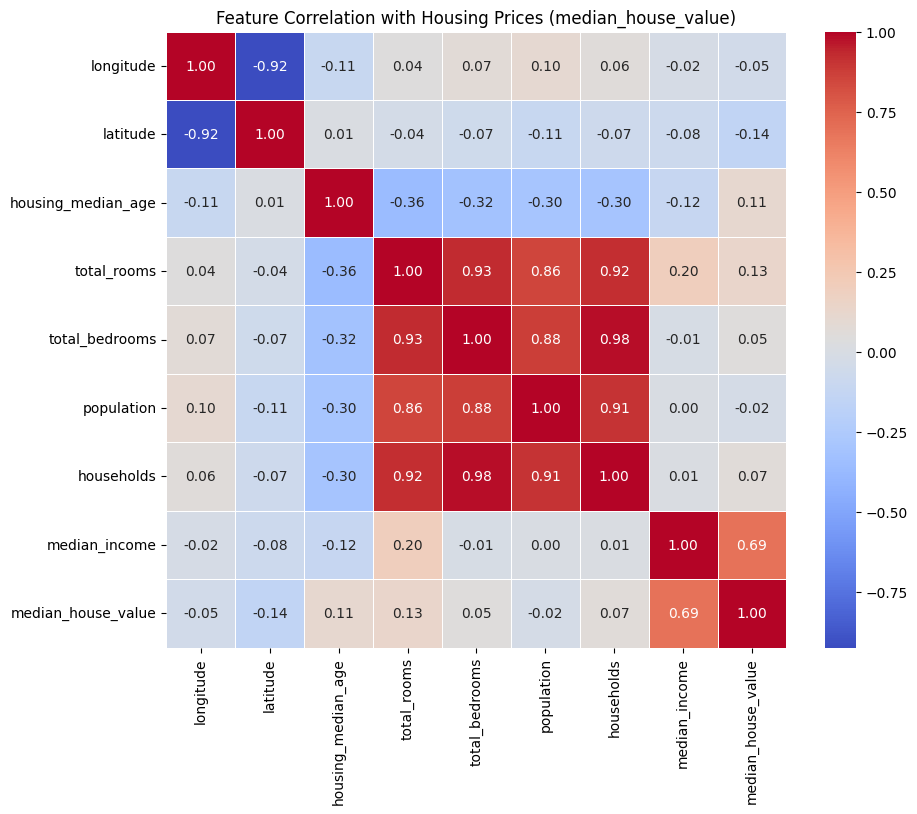

Feature most correlated with housing price: median_income (Correlation: 0.688)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation with Housing Prices (median_house_value)')
plt.show()

# Extract correlation with housing prices (median_house_value) and drop 'median_house_value' itself
correlation_with_price = correlation_matrix['median_house_value'].drop('median_house_value')

# Find the feature with the highest correlation to housing prices
max_correlation_feature = correlation_with_price.idxmax()
max_correlation_value = correlation_with_price.max()

# Print the result
print(f"Feature most correlated with housing price: {max_correlation_feature} (Correlation: {max_correlation_value:.3f})")


List the features that could be combined to improve correlation and
plot again to see if correlation has improved

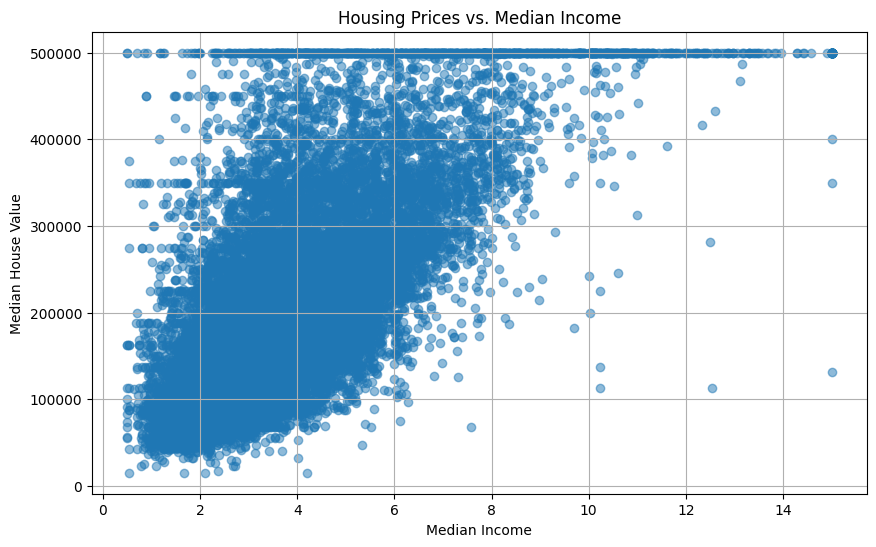

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Housing Prices vs. Median Income')
plt.grid(True)
plt.show()

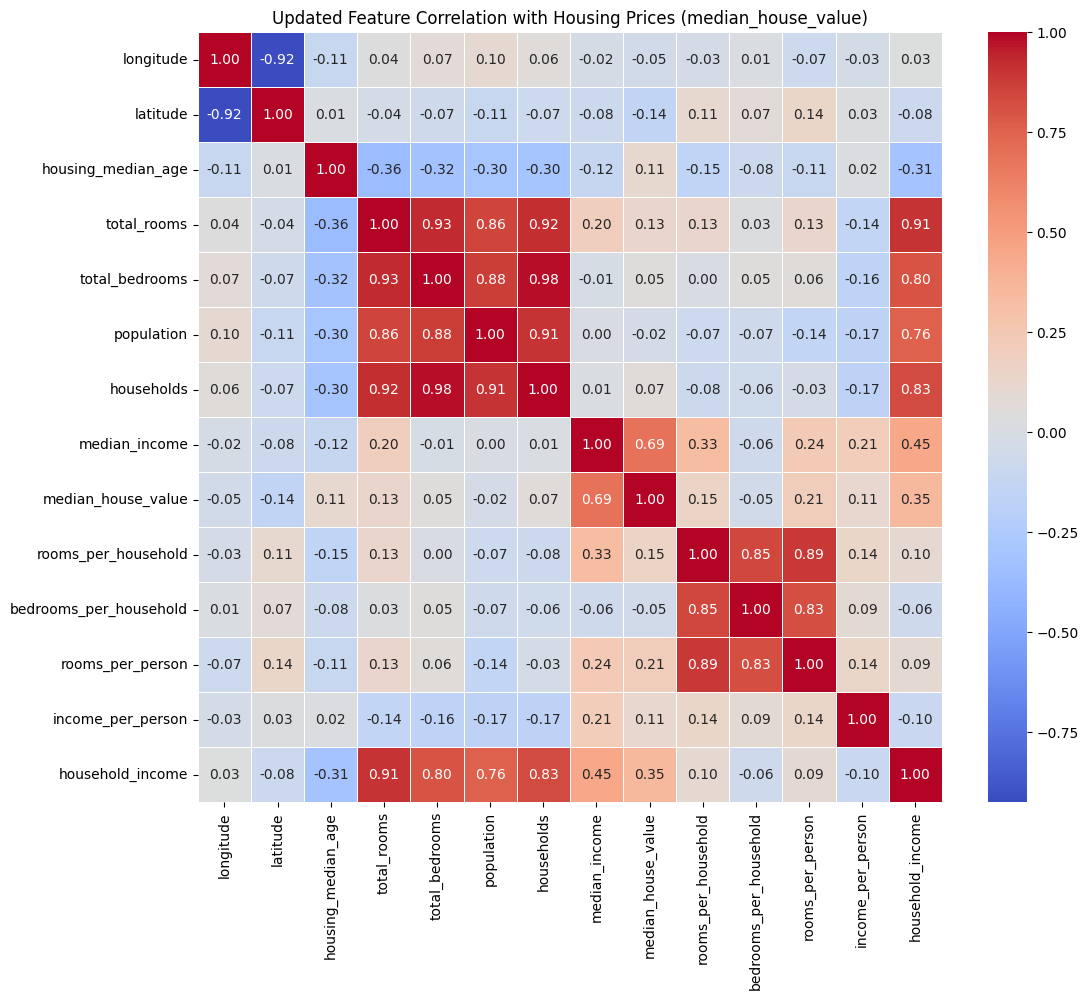

Feature most correlated with housing price after combining: median_income (Correlation: 0.688)


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']
df['rooms_per_person'] = df['total_rooms'] / df['population']
df['income_per_person'] = df['median_income'] / df['population']
df['household_income'] = df['median_income'] * df['households']

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Updated Feature Correlation with Housing Prices (median_house_value)')
plt.show()

correlation_with_price = correlation_matrix['median_house_value'].drop('median_house_value')

max_correlation_feature = correlation_with_price.idxmax()
max_correlation_value = correlation_with_price.max()

print(f"Feature most correlated with housing price after combining: {max_correlation_feature} (Correlation: {max_correlation_value:.3f})")


List the features that needs to be cleaned and demonstrate the
process of cleaning


In [23]:
# Check for missing values
missing_values = df.isnull().sum()

# List columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
total_bedrooms            207
bedrooms_per_household    207
dtype: int64


In [24]:
# Fill missing values in 'total_bedrooms' with the median of the column
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

# Recalculate 'bedrooms_per_household' after filling missing 'total_bedrooms'
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']

# Check if missing values are handled
print(df.isnull().sum())


longitude                 0
latitude                  0
housing_median_age        0
total_rooms               0
total_bedrooms            0
population                0
households                0
median_income             0
median_house_value        0
ocean_proximity           0
income_cat                0
rooms_per_household       0
bedrooms_per_household    0
rooms_per_person          0
income_per_person         0
household_income          0
dtype: int64


In [25]:
# Select only numeric columns for IQR calculation
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the IQR for numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers (values outside the range of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR)
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Show the rows that have outliers
outliers_rows = df[outliers.any(axis=1)]

# Count of outliers in each column
outliers_count = outliers.sum()

print("Outliers in the dataset:")
print(outliers_count)

# Optionally, display the rows with outliers
print("\nRows with outliers:")
print(outliers_rows)


Outliers in the dataset:
longitude                    0
latitude                     0
housing_median_age           0
total_rooms               1287
total_bedrooms            1306
population                1196
households                1220
median_income              681
median_house_value        1071
rooms_per_household        511
bedrooms_per_household    1562
rooms_per_person           402
income_per_person         1542
household_income          1269
dtype: int64

Rows with outliers:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
41       -122.26     37.83                51.0        936.0           311.0   
...          ...       ...       

In [26]:
# List of columns to check for outliers
columns_to_check = [
    'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
    'households', 'median_income', 'median_house_value', 'rooms_per_household',
    'bedrooms_per_household', 'rooms_per_person', 'income_per_person', 'household_income'
]

# Calculate the IQR for each column
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers (values outside the range of Q1 - 1.5 * IQR and Q3 + 1.5 * IQR)
outliers = (df[columns_to_check] < (Q1 - 1.5 * IQR)) | (df[columns_to_check] > (Q3 + 1.5 * IQR))

# Filter out the rows with any outliers
df_cleaned = df[~outliers.any(axis=1)]

# Check if any outliers remain
print("Outliers removed. Remaining data:")
print(df_cleaned.shape)


Outliers removed. Remaining data:
(15327, 16)


Is there any categorical data that needs to be converted to
numerical? If so explain the method used to convert and code the
same and show the output.

In [30]:
import pandas as pd

# Example: If df is already loaded
# Convert 'ocean_proximity' to numerical data using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_household,rooms_per_person,income_per_person,household_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,6.984127,1.023810,2.732919,0.025855,1048.9752,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,6.238137,0.971880,2.956685,0.003457,9446.9932,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,8.288136,1.073446,2.957661,0.014632,1284.5598,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,5.817352,1.073059,2.283154,0.010113,1235.8389,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,1.081081,2.879646,0.006807,996.1658,False,False,True,False


Discuss the importance of feature scaling

In [28]:
# Feature scaling is important because it ensures that all features contribute equally to the model.
# Without scaling, features with larger ranges may dominate the learning process, leading to biased results.

# Common Scaling Methods:

# 1. Min-Max Scaling (Normalization):
#    - Rescales data to a fixed range (e.g., 0 to 1).
#    - Formula: (X - X_min) / (X_max - X_min)
#    - This is useful when features have a known, bounded range.


# 2. Standardization (Z-score Normalization):
#    - Scales data to have a mean of 0 and a standard deviation of 1.
#    - Formula: (X - mean) / std_dev
#    - This is commonly used when the data has an unknown distribution or when the model expects zero-centered data.

# Scaling improves:
# - Model performance: Ensures all features are treated equally, avoiding biased results.
# - Convergence speed: Helps gradient descent converge faster, especially for linear models and neural networks.
# - Fairness among features: Without scaling, features with larger magnitudes could dominate the learning process.


Design a pipeline inculcating (Custom transform, feature
scaling and encoding). Explain how it works

In [33]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming df is already loaded and cleaned
# Check column names
df.columns = df.columns.str.strip()  # Strip any leading/trailing spaces in column names
print(df.columns)  # Ensure column names are correct

# 1. Custom Transformer (Adding 'rooms_per_household' feature)
class CustomFeatureTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['rooms_per_household'] = X['total_rooms'] / X['households']  # Create the new feature
        return X

# 2. Define the numerical and categorical features
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
categorical_features = ['ocean_proximity']

# 3. Define the preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # Handle missing values in numerical features
            ('scaler', StandardScaler())  # Feature scaling (standardization)
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical data
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding for categorical features
        ]), categorical_features)
    ])

# 4. Create the full pipeline with custom feature creation + preprocessing
pipeline = Pipeline([
    ('custom', CustomFeatureTransformer()),  # Apply custom transformation (add 'rooms_per_household')
    ('preprocessor', preprocessor)  # Apply preprocessing (scaling and encoding)
])

# 5. Apply the pipeline to your dataset (df)
processed_data = pipeline.fit_transform(df)

# 6. Get the column names for the transformed data
num_cols = numerical_features + ['rooms_per_household']  # Include the custom feature
cat_cols = preprocessor.transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_features)

# Combine all column names
all_columns = num_cols + list(cat_cols)

# 7. Adjust the column names if necessary to match the transformed data shape
if processed_data.shape[1] == len(all_columns):
    # If the number of columns matches, create the DataFrame
    processed_df = pd.DataFrame(processed_data, columns=all_columns)
else:
    # Handle mismatch if any, and print the correct column count
    print(f"Mismatch in number of columns: processed data has {processed_data.shape[1]} columns, expected {len(all_columns)} columns.")
    print("Adjusted column names:", all_columns)




Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat',
       'rooms_per_household', 'bedrooms_per_household', 'rooms_per_person',
       'income_per_person', 'household_income'],
      dtype='object')
Mismatch in number of columns: processed data has 12 columns, expected 13 columns.
Adjusted column names: ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'rooms_per_household', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
